In [1]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay

In [2]:
# using pandas reading csv file and store it in a dataframe

path = r"C:\Users\nvish\Downloads\bank_Marketing.csv"

df = pd.read_csv(path)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.shape

(11162, 17)

In [4]:
# Details of columns in the data

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

# Exploratory Data Analysis (EDA)

In [10]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

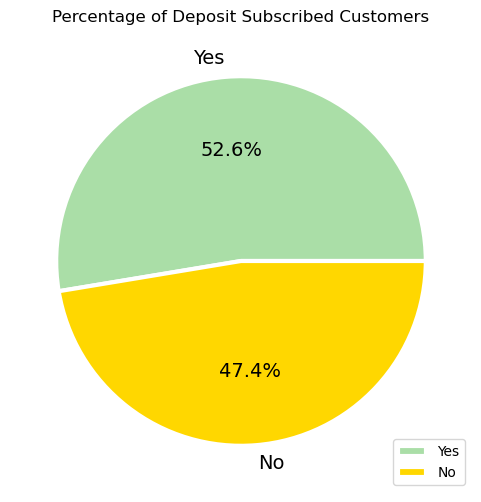

In [11]:
count=df['deposit'].value_counts()
label=['Yes','No']
plt.figure(figsize=(6,6))
plt.title("Percentage of Deposit Subscribed Customers")
plt.pie(count,autopct='%1.1f%%',labels=label,textprops={"fontsize":14},colors=['#AADEA7', '#FFD700'], wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.legend(loc='lower right')
plt.show()

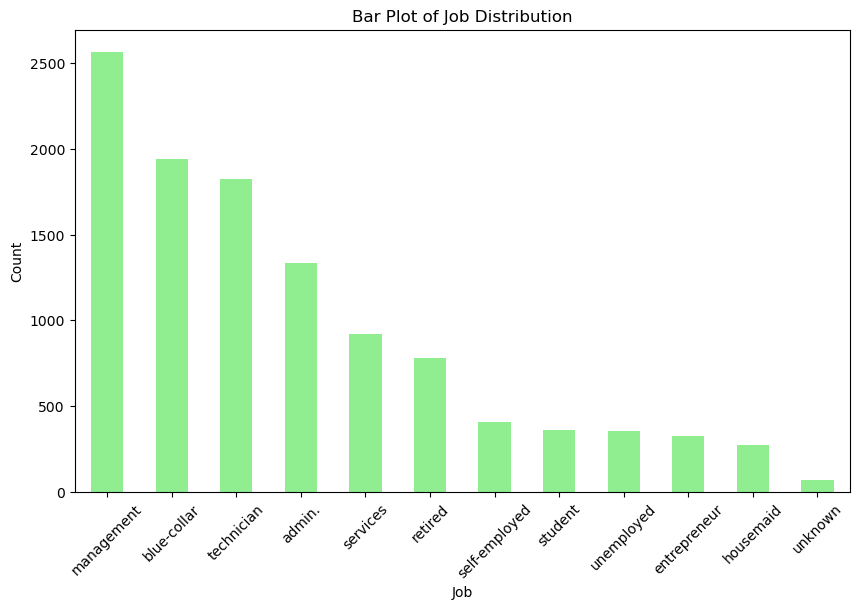

In [12]:
plt.figure(figsize=(10, 6))
job_counts = df['job'].value_counts()
job_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar Plot of Job Distribution')
plt.xticks(range(len(job_counts)), job_counts.index, rotation=45)
plt.show()

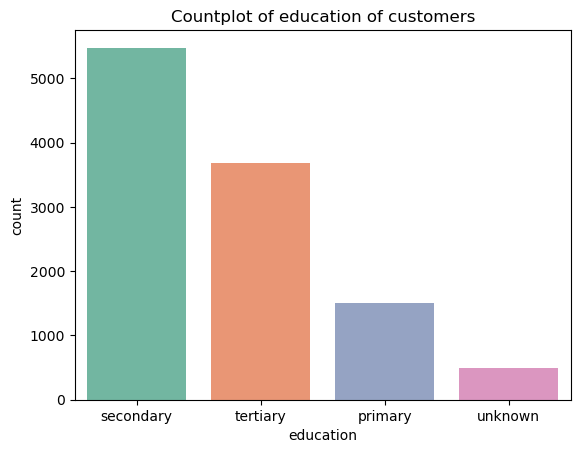

In [13]:
sns.countplot(x = 'education', palette = 'Set2', data = df)
plt.title("Countplot of education of customers")
plt.show()

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [15]:
le = LabelEncoder()
cols=['job','marital','education','default','housing','loan','contact','poutcome','deposit']
for j in cols:
  df[j]=le.fit_transform(df[j])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,may,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,may,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,may,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,may,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,may,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,apr,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,jun,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,aug,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,may,9,2,172,5,0,0


In [16]:
month_to_num = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12}

# Convert 'Month' column to numeric
df['month'] = df['month'].map(month_to_num)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,4,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,8,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,5,9,2,172,5,0,0


In [17]:
df.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
deposit      int32
dtype: object

In [18]:
file_path = 'data/Dataset-2_pre-processed_file.csv'
df.to_csv(file_path, index=False)

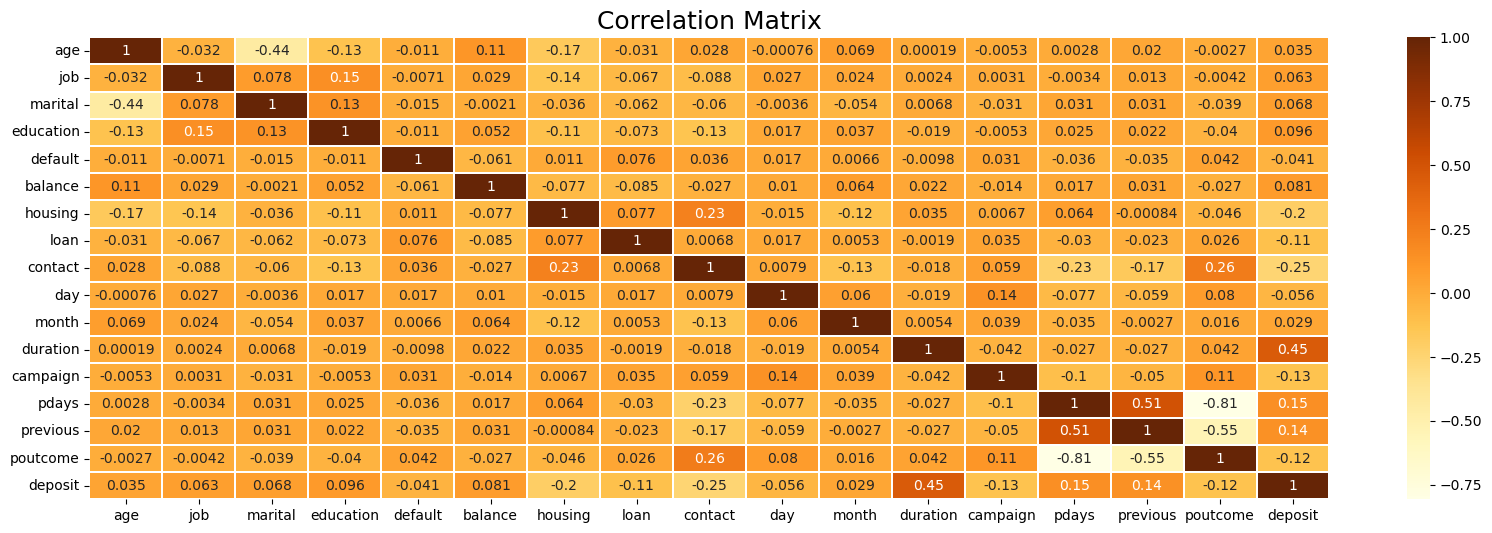

In [19]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap="YlOrBr")
plt.title('Correlation Matrix',fontsize=18)
plt.show()

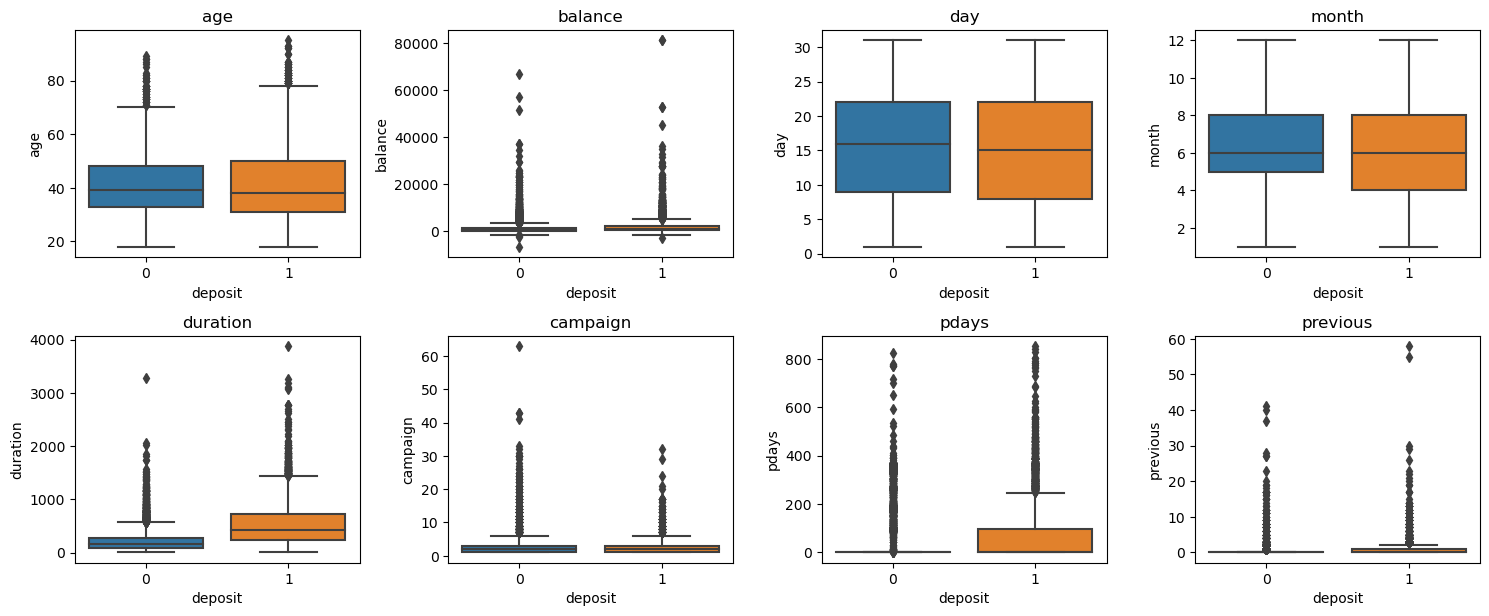

In [20]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='deposit', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
x = df.drop(columns=['deposit'])
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,4,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,8,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,5,9,2,172,5,0


In [22]:
y = df['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

In [23]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20233918, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [25]:
X_train.shape

(7813, 16)

In [26]:
X_test.shape

(3349, 16)

In [27]:
dec=DecisionTreeClassifier(criterion='entropy',max_depth=25,random_state=42)
dec.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, random_state=42)

In [28]:
y_pred=dec.predict(X_test)

In [29]:
print("Accuracy_Score:",accuracy_score(y_pred,y_test))
print("\nF1_Score:",f1_score(y_pred,y_test))

Accuracy_Score: 0.7951627351448194

F1_Score: 0.7831858407079645



Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1774
           1       0.78      0.79      0.78      1575

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349


Confusion Matrix Display:



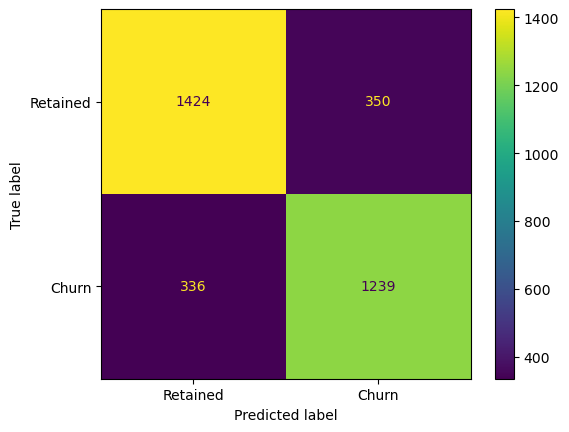

In [30]:
print("\nClassification Report:")
print("\n",classification_report(y_pred,y_test))
print("\nConfusion Matrix Display:")
print("\n",ConfusionMatrixDisplay.from_predictions(y_pred,y_test,display_labels=['Retained','Churn']))